#1. Importation des bibliotheques


In [ ]:
import tensorflow as tf
from tensorflow.keras import datasets
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import train_test_split
from tensorflow.keras.datasets import fashion_mnist
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import LabelBinarizer


#2. Chargement et Préparation des données

In [ ]:

# Charger le dataset Fashion MNIST
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

# Supprimer la classe 6
train_filter = y_train != 6
test_filter = y_test != 6

# Appliquer le filtre pour obtenir les données sans la classe 6
x_train, y_train = x_train[train_filter], y_train[train_filter]
x_test, y_test = x_test[test_filter], y_test[test_filter]

# Relabeling les classes après suppression de la classe 6
y_train = np.where(y_train > 6, y_train - 1, y_train)  # Décaler les labels au-dessus de 6
y_test = np.where(y_test > 6, y_test - 1, y_test)

# Normaliser les images (valeurs entre 0 et 1)
x_train, x_test = x_train / 255.0, x_test / 255.0

# Applatir les images pour les modèles scikit-learn
x_train_flat = x_train.reshape(-1, 28*28)
x_test_flat = x_test.reshape(-1, 28*28)

# Vérification de la forme des données après filtrage
print(f"x_train shape: {x_train.shape}, x_test shape: {x_test.shape}")



x_train shape: (54000, 28, 28), x_test shape: (9000, 28, 28)


In [ ]:

class_names = [
    'T-shirt/top', 'Pantalon', 'Pull-over', 'Robe', 'Manteau',
    'Sandale', 'Baskets', 'Sac à main', 'Bottes'
]


# 3. Entrainement SVM

In [ ]:
# Initialiser et entraîner le modèle SVM
svm = SVC(kernel='rbf', C=10, gamma='scale')
svm.fit(x_train_flat, y_train)

# Prédire sur les données de test
y_pred_svm = svm.predict(x_test_flat)

# Calculer l'exactitude sur les données d'entraînement
train_accuracy_svm = svm.score(x_train_flat, y_train)

# Calculer l'exactitude sur les données de test
test_accuracy_svm = svm.score(x_test_flat, y_test)

# Afficher l'exactitude sur les données d'entraînement et de test
print(f"Train Accuracy: {train_accuracy_svm}")
print(f"Test Accuracy: {test_accuracy_svm}")


Train Accuracy: 0.9842037037037037
Test Accuracy: 0.9383333333333334


# 4. Entrainement du XGBoost

In [ ]:
# Initialiser et entraîner le modèle XGBoost
xgb = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss')
xgb.fit(x_train_flat, y_train)

# Prédire sur les données de test
y_pred_xgb = xgb.predict(x_test_flat)

# Calculer l'exactitude sur les données d'entraînement
train_accuracy_xgb = xgb.score(x_train_flat, y_train)

# Calculer l'exactitude sur les données de test
test_accuracy_xgb = xgb.score(x_test_flat, y_test)

# Afficher l'exactitude sur les données d'entraînement et de test
print(f"Train Accuracy (xgb): {train_accuracy_xgb}")
print(f"Test Accuracy (xgb): {test_accuracy_xgb}")


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [21:22:06] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Train Accuracy (xgb): 0.9842592592592593
Test Accuracy (xgb): 0.9324444444444444


# 5. Calculer le ROC curve et AUC

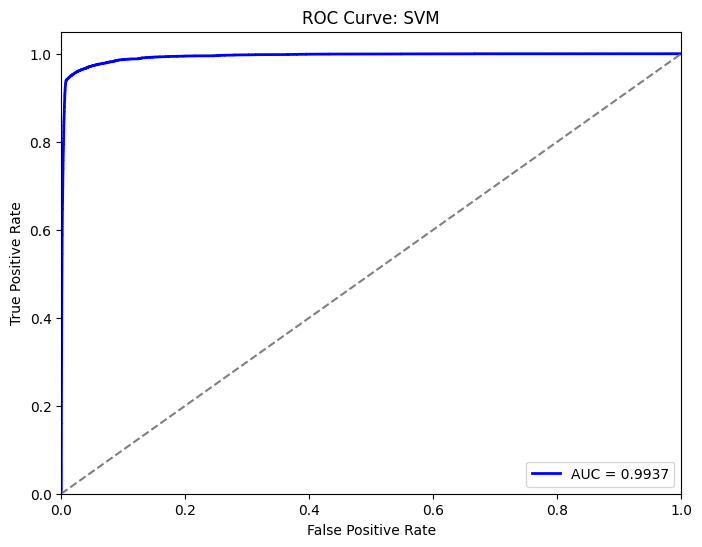

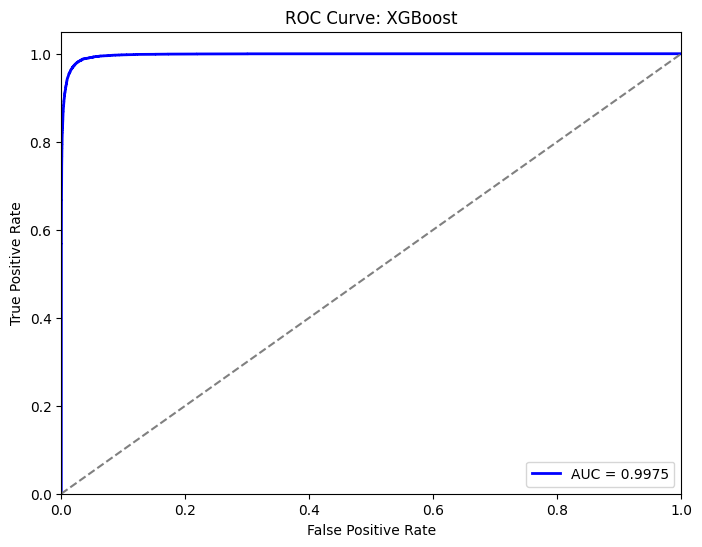

In [ ]:

# Function to plot the ROC curve
def plot_roc_curve(y_true, y_pred_prob, model_name):
    lb = LabelBinarizer()
    y_true_bin = lb.fit_transform(y_true)

    # Calculate the ROC curve and AUC
    fpr, tpr, _ = roc_curve(y_true_bin.ravel(), y_pred_prob.ravel())
    roc_auc = auc(fpr, tpr)

    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, color='blue', lw=2, label=f'AUC = {roc_auc:.4f}')
    plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f"ROC Curve: {model_name}")
    plt.legend(loc='lower right')
    plt.show()

# Model predictions (probabilities) for each classifier

svm_prob = svm.decision_function(x_test_flat)
xgb_prob = xgb.predict_proba(x_test_flat)

# Display ROC curves

plot_roc_curve(y_test, svm_prob, 'SVM')
plot_roc_curve(y_test, xgb_prob, 'XGBoost')


# 6. Evaluation SVM et XGBoost

In [ ]:
print("SVM Classification Report:")
print(classification_report(y_test, y_pred_svm))

print("XGBoost Classification Report:")
print(classification_report(y_test, y_pred_xgb))


SVM Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.93      0.93      1000
           1       0.99      0.97      0.98      1000
           2       0.86      0.87      0.86      1000
           3       0.92      0.92      0.92      1000
           4       0.87      0.88      0.87      1000
           5       0.97      0.97      0.97      1000
           6       0.95      0.96      0.96      1000
           7       0.98      0.98      0.98      1000
           8       0.97      0.96      0.97      1000

    accuracy                           0.94      9000
   macro avg       0.94      0.94      0.94      9000
weighted avg       0.94      0.94      0.94      9000

XGBoost Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.92      0.93      1000
           1       1.00      0.97      0.98      1000
           2       0.85      0.86      0.86      1000
           3       0


Classification Report (XGBoost):
              precision    recall  f1-score   support

           0       0.94      0.92      0.93      1000
           1       1.00      0.97      0.98      1000
           2       0.85      0.86      0.86      1000
           3       0.90      0.92      0.91      1000
           4       0.86      0.86      0.86      1000
           5       0.98      0.96      0.97      1000
           6       0.94      0.96      0.95      1000
           7       0.98      0.98      0.98      1000
           8       0.95      0.96      0.95      1000

    accuracy                           0.93      9000
   macro avg       0.93      0.93      0.93      9000
weighted avg       0.93      0.93      0.93      9000



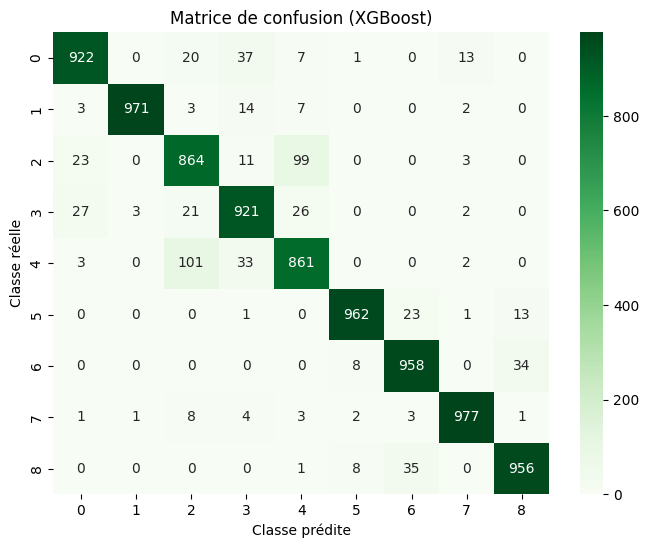


Classification Report (SVM):
              precision    recall  f1-score   support

           0       0.94      0.93      0.93      1000
           1       0.99      0.97      0.98      1000
           2       0.86      0.87      0.86      1000
           3       0.92      0.92      0.92      1000
           4       0.87      0.88      0.87      1000
           5       0.97      0.97      0.97      1000
           6       0.95      0.96      0.96      1000
           7       0.98      0.98      0.98      1000
           8       0.97      0.96      0.97      1000

    accuracy                           0.94      9000
   macro avg       0.94      0.94      0.94      9000
weighted avg       0.94      0.94      0.94      9000



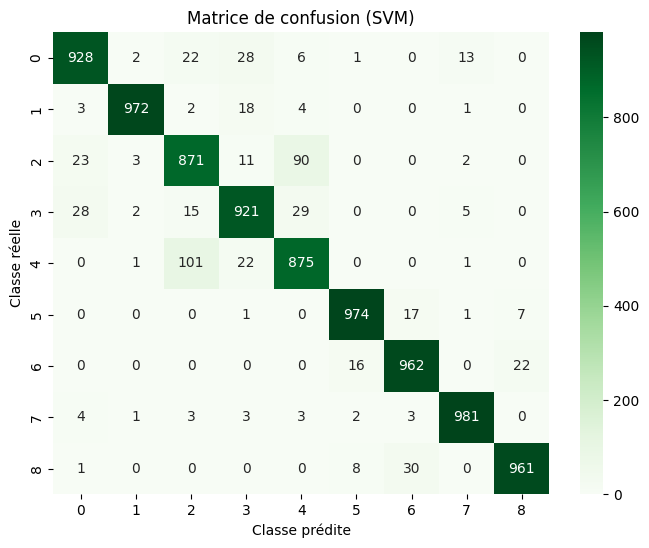

In [ ]:
print("XGBoost Classification Report:")
print(classification_report(y_test, y_pred_xgb))
print("SVM Classification Report:")
print(classification_report(y_test, y_pred_svm))
